# Importing necessary libraries


**Mô tả bài toán**: Cài đặt Logistic Regression với Python và Numpy với dữ liệu sinh ra ngẫu nhiên

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

Sau đó, chúng ta sẽ định nghĩa hàm sigmoid theo công thức sigmoid(x)\ =\ 1\ /\ (1\ +\ e^{-x})

In [21]:
# Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

Tiếp theo là hàm cost, lưu ý rằng hàm cost trong logistic khác hàm cost trong linear. Trong logistic regression, chúng ta sử dụng hàm sigmoid để tính tổng trọng số để cho ra kết quả phi tuyến tính

In [22]:
# Cost function
def compute_cost(X,y,theta):
    m = len(y)
    h=sigmoid(X@theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h+epsilon)) - ((1-y).T @ np.log(1-h + epsilon)))
    return cost

Tiếp theo là tính gradient descent để tối ưu hóa các tham số. Việc thực hiện gradient descent không khác nhiều so với linear regression trừ hàm được sử dụng ở đây là hàm sigmoid 

In [23]:
# Gradient Descent 
def gradient_descent(X,y,params,learning_rate, iterations):
    m = len(y)
    cost_history =  np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y))
        cost_history[i] = compute_cost(X,y,params)

    return (cost_history, params)

Trong hàm dự đoán cho mô hình, nếu giá trị trên 0.5 chúng ta sẽ làm tròn thành 1, nghĩa là mẫu thuộc về class 1 và ngược lại nếu giá trị dưới 0.5, mẫu thuộc về class 0

In [24]:
# predict function
def predict(X, params):
    return np.round(sigmoid(X @ params))

# Implement in random dataset


Tiếp theo chúng ta sẽ tạo ra random dataset với hàm make_classification của sklearn.datasets. Chúng ta sẽ tạo ra 500 điểm dữ liệu với 2 class và được visualize theo hình bên dưới

C:\Users\nqhuy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


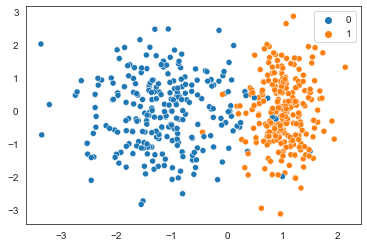

In [25]:
# Make random dataset
X,y = make_classification(n_samples=500, n_features=2, n_redundant=0, 
                            n_informative=1, n_clusters_per_class=1, random_state=14)

y = y[:, np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0], X[:,1], hue=y.reshape(-1));

Bây giờ chúng ta sẽ chạy thuật toán tính toán các tham số

In [26]:
m = len(y)

X = np.hstack((np.zeros((m,1)), X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03
initial_cost = compute_cost(X,y,params)

print(f'Initial Cost is {initial_cost} \n')
(cost_history, params_optimal) = gradient_descent(X,y, params, learning_rate, iterations)

print('Optimal Parameters are: \n', params_optimal, '\n')


Initial Cost is [[0.69312718]] 

Optimal Parameters are: 
 [[0.        ]
 [3.17742536]
 [0.03857884]] 



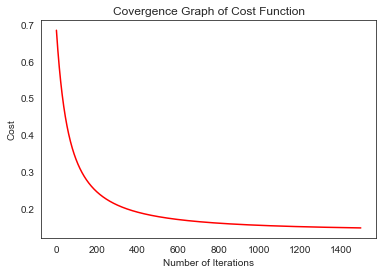

In [27]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title('Covergence Graph of Cost Function')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

In [28]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred==y))/ float(len(y))

print(score)

0.948


Sau khi đã chạy thuật toán, chúng ta sẽ vẽ ra đường phân cách giữa 2 class. Như hình bên dưới thì kết quả thu được có độ chính xác khá cao.

C:\Users\nqhuy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


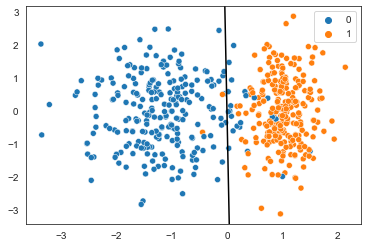

In [29]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X[:,1], X[:,2], hue=y.reshape(-1));

ax= plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope*x_vals)
plt.plot(x_vals, y_vals, c='k');